In [1]:
# Neural network for time series prediction

# Import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as datetime

# import neural network libraries
from keras.models import Sequential
from keras.layers import Dense, LSTM, Dropout
from keras.callbacks import EarlyStopping
from keras import optimizers
from sklearn.model_selection import train_test_split
import yfinance as yf
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range = (0, 1))

# Import data
data = yf.download('AMZN', start='2017-01-01', end='2022-12-03')
#data = data.reset_index()


2022-12-03 06:48:08.173677: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2022-12-03 06:48:08.291421: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-12-03 06:48:08.291443: I tensorflow/compiler/xla/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.
2022-12-03 06:48:08.934058: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; dlerror: libnvinfer.so.7: cannot open shared object file: No such file or directory
2022-

[*********************100%***********************]  1 of 1 completed


In [2]:
# define nn function
def nn_model(X_train, y_train, X_test, y_test, epochs, batch_size, neurons):
    model = Sequential()
    model.add(LSTM(units = neurons, return_sequences = True, input_shape = (X_train.shape[1], 1)))
    model.add(Dropout(0.2))
    model.add(LSTM(units = neurons, return_sequences = True))
    model.add(Dropout(0.2))
    model.add(LSTM(units = neurons, return_sequences = True))
    model.add(Dropout(0.2))
    model.add(LSTM(units = neurons))
    model.add(Dropout(0.2))
    model.add(Dense(units = 1))
    model.compile(optimizer = 'adam', loss = 'mean_squared_error')
    model.fit(X_train, y_train, epochs = epochs, batch_size = batch_size)
    y_pred = model.predict(X_test)

    # transform data back to original scale
    y_pred = sc.inverse_transform(y_pred)
    return y_pred
    

In [3]:
# drop date
#data = data.drop(['Date'], axis=1)

# use date as index
#data = data.set_index('Date')

# split data
x = data.drop(['Close'], axis=1)
y = data['Close']

train_size = int(len(data) * 0.8)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, shuffle=False)

#fit y to scalar
y_train = y_train.values.reshape(-1,1)
y_train = sc.fit_transform(y_train)

# reshape data
x_train = np.reshape(x_train.values, (x_train.shape[0], x_train.shape[1], 1))
x_test = np.reshape(x_test.values, (x_test.shape[0], x_test.shape[1], 1))



epochs = 25
batch_size = 5
neurons = 100
predicted_stock_price = nn_model(x_train, y_train, x_test, y_test, epochs, batch_size, neurons)



2022-12-03 06:48:10.475267: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:981] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-12-03 06:48:10.475524: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-12-03 06:48:10.475959: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcublas.so.11'; dlerror: libcublas.so.11: cannot open shared object file: No such file or directory
2022-12-03 06:48:10.476025: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcublasLt.so.11'; dlerror: libcublasLt.so.11: cannot open shared object file: No such file or directory
2022-12-03 06:48:10.476198: W tensorflow/c

Epoch 1/25
239/239 [==============================] - 8s 12ms/step - loss: 0.0213
Epoch 2/25
239/239 [==============================] - 3s 12ms/step - loss: 0.0033
Epoch 3/25
239/239 [==============================] - 3s 12ms/step - loss: 0.0028
Epoch 4/25
239/239 [==============================] - 3s 12ms/step - loss: 0.0029
Epoch 5/25
239/239 [==============================] - 3s 13ms/step - loss: 0.0024
Epoch 6/25
239/239 [==============================] - 3s 13ms/step - loss: 0.0027
Epoch 7/25
239/239 [==============================] - 3s 12ms/step - loss: 0.0021
Epoch 8/25
239/239 [==============================] - 3s 12ms/step - loss: 0.0021
Epoch 9/25
239/239 [==============================] - 3s 14ms/step - loss: 0.0017
Epoch 10/25
239/239 [==============================] - 3s 14ms/step - loss: 0.0015
Epoch 11/25
239/239 [==============================] - 3s 12ms/step - loss: 0.0016
Epoch 12/25
239/239 [==============================] - 3s 13ms/step - loss: 0.0017
Epoch 13/25
2

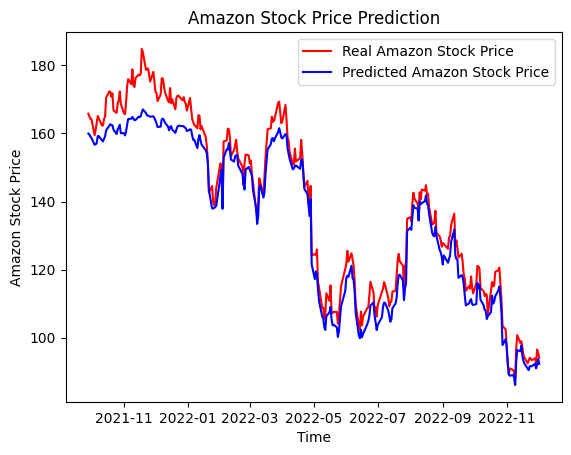

In [4]:
# drop date from y_test
#y_test = y_test.drop(['Date'], axis=1)
# set index of predicted_stock_price to y_test
# scale predicted_stock_price

predicted_stock_price = pd.DataFrame(predicted_stock_price, index=y_test.index, columns=['Close'])
plt.plot(y_test, color = 'red', label = 'Real Amazon Stock Price')
plt.plot(predicted_stock_price, color = 'blue', label = 'Predicted Amazon Stock Price')
plt.title('Amazon Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Amazon Stock Price')
plt.legend()
plt.show()

In [5]:
a = np.array(y_test)
b = predicted_stock_price.to_numpy().flatten()
print("For Neural Network model:")
print("Accuracy : ", np.isclose(a, b, atol=10).mean() * 100, "%")
print("Mean Absolute Error: ", np.mean(np.abs(a - b)))

For Neural Network model:
Accuracy :  92.97658862876254 %
Mean Absolute Error:  5.015725789660196
